#Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize Examples

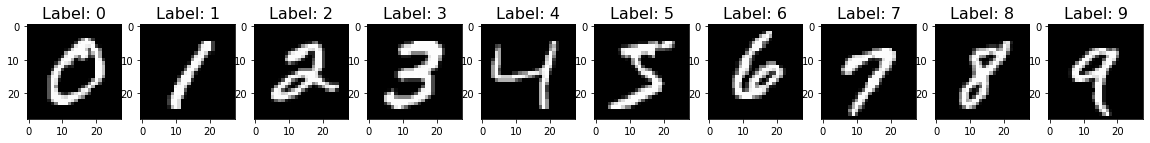

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

#One Hot Encoding 

In [5]:
# y_train is numbers which is continous but we're doing classification so we do one hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

#Prepare Data

In [6]:
# Normalize data
minimum = 0
maximum = 255.0

x_train = (x_train - minimum) / (maximum - minimum)
x_test = (x_test - minimum) / (maximum - minimum)

In [7]:
# Reshape data
# Each sample has size 28x28 so we want to flatten it into 1 long vector and pass it to the neural network

x_train = x_train.reshape(x_train.shape[0], -1) # -1 converts the 28x28 matrix to 1 dimension
x_test = x_test.reshape(x_test.shape[0], -1)

# Create Model - Fully Connected Neural Network

In [8]:
model = Sequential()
model.add(Dense(units=128, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(units=128, activation='relu')) # no need to specify shape because its automatic
model.add(Dropout(0.25)) # 25% of the neurons will be deactivated during training to prevent overfitting
model.add(Dense(units=10, activation='softmax')) # 10 digits (classifier)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train

In [9]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.6131 - accuracy: 0.8234
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2302 - accuracy: 0.9338
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1716 - accuracy: 0.9503
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1369 - accuracy: 0.9601
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1140 - accuracy: 0.9658
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0969 - accuracy: 0.9715
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0824 - accuracy: 0.9751
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0725 - accuracy: 0.9779
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0563 - accura

# Evaluate

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss : {}, Test Accuracy : {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9774
Test Loss : 0.07127292454242706, Test Accuracy : 0.977400004863739


In [11]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1) # get index of the highest probability
print(y_pred)
print(y_pred_classes)

[[3.41524640e-07 8.69900759e-07 9.89353648e-05 ... 9.98910308e-01
  5.55996576e-06 3.32683921e-05]
 [6.42688065e-07 2.69468321e-04 9.99654055e-01 ... 7.41266533e-08
  2.72654470e-05 1.33790334e-09]
 [6.81445135e-06 9.98509824e-01 1.22833328e-04 ... 8.51313525e-04
  6.30408322e-05 1.11220115e-05]
 ...
 [6.61278463e-11 4.66242511e-09 2.00083200e-10 ... 8.11814857e-07
  3.14885170e-07 7.48493630e-06]
 [8.51370103e-08 7.84390330e-09 2.67016131e-11 ... 4.70293005e-09
  6.37348921e-06 5.84837112e-09]
 [3.01821359e-08 1.40778266e-11 1.73250339e-08 ... 8.47444402e-13
  4.43335013e-09 2.05281833e-10]]
[7 2 1 ... 4 5 6]


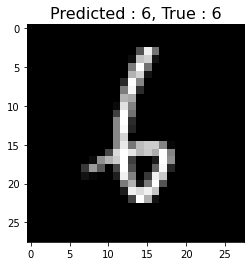

In [12]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted : {}, True : {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

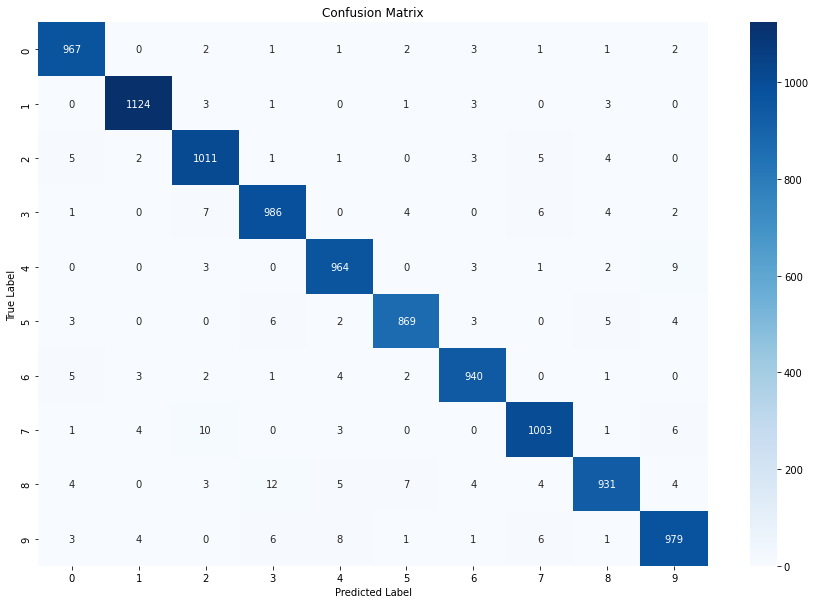

In [13]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap='Blues')
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

# Investigate Some Errors

In [14]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors =  y_true[errors]
x_test_errors =  x_test[errors]

In [15]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

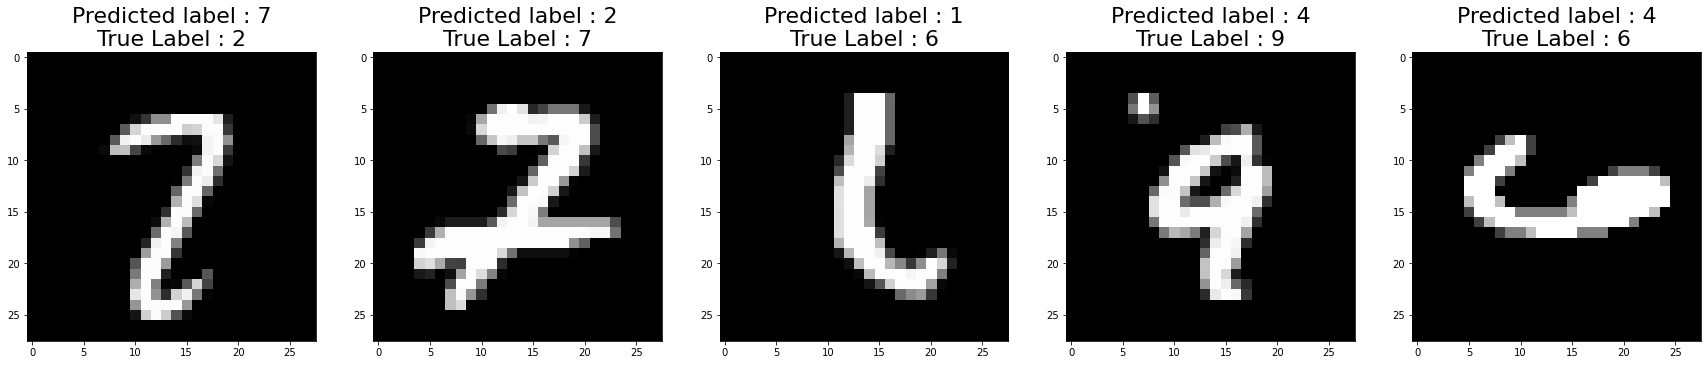

In [16]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))
for i in range(num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28, 28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label : {}\nTrue Label : {}".format(y_p, y_t), fontsize=22)